In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import kendalltau
import scipy.stats as stats
from sklearn import preprocessing

In [2]:
#leer la base de datos sin depresion
df = pd.read_csv('data_sin_depresion/cleaned_sabe_healthy.csv', encoding='latin-1')

In [3]:
df.drop(df.loc[df['estado_civil']==9].index, axis=0, inplace = True)
df.drop(df.loc[df['actividad_fisica']==9].index, axis=0, inplace = True)

In [4]:
df.columns

Index(['area_vivienda', 'estrato', 'sexo', 'edad', 'estado_civil',
       'num_personas_hogar', 'afiliacion_pension', 'afiliacion_salud',
       'grupo_etnico', 'raza',
       ...
       'orientacion', 'conteo', 'minimental', 'cogcat_folstein',
       'test_depresion', 'tiene_depresion', 'barthel', 'nivel_dependencia',
       'ayuda', 'voluntario'],
      dtype='object', length=106)

In [5]:
df['mem_subjetiva'].value_counts()
#1 buena - muy mala 5

3    1435
2    1116
1     175
4     172
5      27
Name: mem_subjetiva, dtype: int64

In [6]:
df['problemas_memoria'].value_counts()
#si 1 - no 4

4    1276
3    1067
1     374
2     208
Name: problemas_memoria, dtype: int64

In [7]:
df['comparacion_memoria'].value_counts()
#1 mejor - 3 peor

2    1921
3     806
1     198
Name: comparacion_memoria, dtype: int64

In [8]:
#Invertimos comparacion memoria y memoria subjetiva para que valores menores representen mala memoria y valores mayores representen buena memoria
df['comparacion_memoria']= 4- df['comparacion_memoria'] 
df['mem_subjetiva']= 6 - df['mem_subjetiva'] 

In [9]:
df['comparacion_memoria'].value_counts()

2    1921
1     806
3     198
Name: comparacion_memoria, dtype: int64

In [10]:
df['mem_subjetiva'].value_counts()

3    1435
4    1116
5     175
2     172
1      27
Name: mem_subjetiva, dtype: int64

In [11]:
#generamos un valor total para la escala de memoria subjetiva, sumando todos los valores
df['escala_memoria'] =  df['comparacion_memoria']+df['problemas_memoria']+df['mem_subjetiva']

In [12]:
#De 3 a 12, 3 siendo el puntaje menor -> deterioro memoria y 12 representa -> mejor memoria.
df['escala_memoria'].value_counts()

10    740
9     563
8     553
7     342
6     254
5     190
11    186
4      67
12     21
3       9
Name: escala_memoria, dtype: int64

<AxesSubplot:xlabel='minimental', ylabel='Count'>

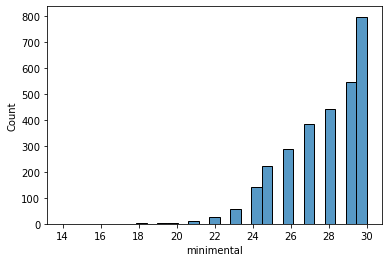

In [13]:
sns.histplot(data= df, x= 'minimental')


<AxesSubplot:xlabel='escala_memoria', ylabel='Count'>

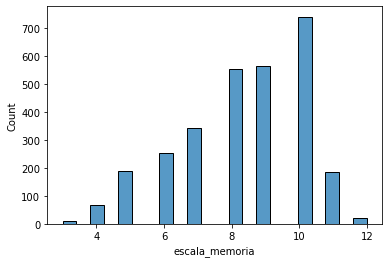

In [14]:
sns.histplot(data= df, x= 'escala_memoria')

<AxesSubplot:xlabel='minimental', ylabel='escala_memoria'>

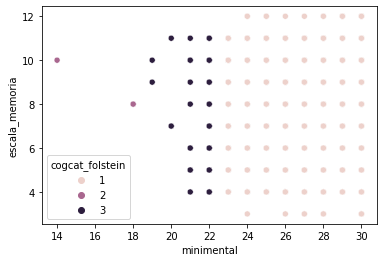

In [15]:
sns.scatterplot(data= df, y= 'escala_memoria', x = 'minimental',hue= 'cogcat_folstein')
#   1 normal
#   2 impaired
#   3 borderline

In [16]:
len(df)

2925

In [17]:
#Borrar entradas con valores de minimental menores a 24
indexes_to_drop = df.query('minimental<=18').index
indexes_to_drop
df.drop(indexes_to_drop, axis = 0, inplace= True)

In [18]:
len(indexes_to_drop)

3

In [19]:
df_deterioro_leve  = df[df['minimental']<24]

<AxesSubplot:xlabel='minimental', ylabel='escala_memoria'>

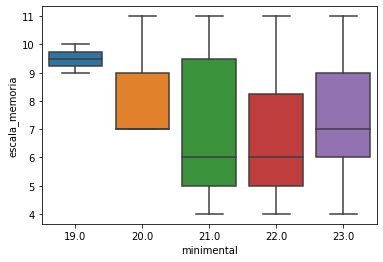

In [20]:
sns.boxplot( data = df_deterioro_leve, y= 'escala_memoria', x = 'minimental')

In [21]:
duda_deterioro  = (df.loc[(df['minimental']>=25) & (df['minimental']<=26)])

<AxesSubplot:xlabel='minimental', ylabel='escala_memoria'>

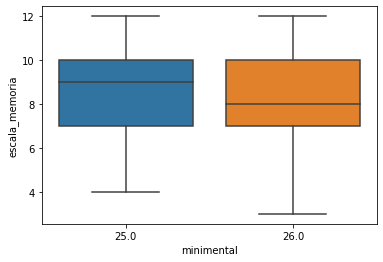

In [22]:
sns.boxplot( data = duda_deterioro, y= 'escala_memoria', x = 'minimental')

In [23]:
sin_deterioro = df[df['minimental']>26]

<AxesSubplot:xlabel='minimental', ylabel='escala_memoria'>

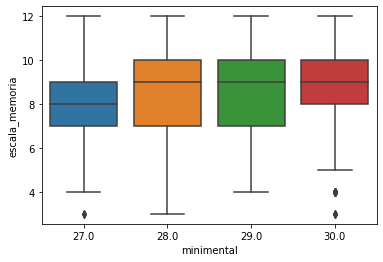

In [24]:
sns.boxplot( data = sin_deterioro, y= 'escala_memoria', x = 'minimental')

In [25]:
print(f'deterioro leve: {len(df_deterioro_leve)}, duda deterioro: {len(duda_deterioro)}, sin deterioro: {len(sin_deterioro)}')

deterioro leve: 101, duda deterioro: 512, sin deterioro: 2166


## Evaluar correlación entre variables y escala_memoria

In [26]:
df['afiliacion_pension'].unique()

array([3, 1, 2], dtype=int64)

In [27]:
#convertir columnas a dummy
df= pd.get_dummies(df, columns = ['fuente_de_agua','medio_transporte','color_piel','mem_subjetiva','problemas_memoria','comparacion_memoria','consumo_cigarrillo','consumo_alcohol','alimentacion','religion','suficiencia_recursos','afiliacion_salud','afiliacion_pension','nivel_educativo','sexualidad','ingresos','estrato', 'percepcion_salud','estado_civil','tipo_de_trabajo','satisfaccion_ingresos','posesion_vivienda','tipo_vivienda','cogcat_folstein'])

In [28]:
df.rename(columns={'color_piel0':'piel_claro','color_piel1':'piel_medio','color_piel2':'piel_oscura','consumo_cigarrillo1':'fumo_y_fuma','consumo_cigarrillo2':'fumo_no_fuma','consumo_cigarrillo3':'no_fumo_fuma','consumo_cigarrillo4':'nunca_ha_fumado','consumo_alcohol1':'alcohol_menos_un_dia','consumo_alcohol2':'alcohol_3_dias_sem','consumo_alcohol3':'alcohol_6dias_sem','consumo_alcohol4':'alcohol_todos_sem','consumo_alcohol5':'alcohol_no_consume','alimentacion1':'alimenta_mucho_menos','alimentacion2':'alimenta_menos','alimentacion3':'alimenta_igual','religion1':'nada_religioso','religion2':'poco_religioso','religion3':'muy_religioso','suficiencia_recursos1':'rec_muy_suficientes','suficiencia_recursos2':'rec_suficientes','suficiencia_recursos3':'rec_insuficientes','suficiencia_recursos4':'rec_muy_insuficientes','afiliacion_salud1':'contributivo','afiliacion_salud2':'subsidiado','afiliacion_salud3':'de_excepcion','afiliacion_salud3':'especial','afiliacion_salud3':'no_afiliado','afiliacion_pension1':'pension_publica','afiliacion_pension2':'pension_privada','afiliacion_pension':'sin_pension','mem_subjetiva_1':'mem_muy_buena','mem_subjetiva_2':'mem_buena','mem_subjetiva_3':'mem_regular','mem_subjetiva_4':'mem_mala','mem_subjetiva_5':'mem_muy_mala','sexualidad_1':'sex_muy_importante','sexualidad_2':'sex_importante','sexualidad_3':'sex_neutro','sexualidad_4':'sex_poco_imp','sexualidad_5':'sex_nada_imp','nivel_educativo_1':'edu_ninguno','nivel_educativo_2':'primaria_incompleta','nivel_educativo_3':'primaria','nivel_educativo_4':'secundaria_incompleta','nivel_educativo_5':'secundaria','nivel_educativo_6':'tecnico_sin_titulo','nivel_educativo_7':'tecnico','nivel_educativo_8':'universitario_sin_titulo','nivel_educativo_9':'universitario','nivel_educativo_10':'posgrado_sin_titulo', 'nivel_educativo_11': 'posgrado','ingresos_1':'<1SMLV', 'ingresos_2':'1SMLV','ingresos_3':'hasta_1.288','ingresos_4':'hasta_1.933','ingresos_5':'hasta_2.577', 'ingresos_6':'mas_de_2.577','percepcion_salud_1':'perc_muy_buena','percepcion_salud_2':'perc_buena','percepcion_salud_3':'perc_regular','percepcion_salud_4':'perc_mala','percepcion_salud_5':'perc_muy mala','estado_civil_1':'casado','estado_civil_2':'unido','estado_civil_3':'separado','estado_civil_4':'viudo','estado_civil_5':'soltero','tipo_de_trabajo_1':'empleado particular','tipo_de_trabajo_2':'empleado gobierno','tipo_de_trabajo_3':'jornalero','tipo_de_trabajo_4':'Empleador','tipo_de_trabajo_5':'trabajador_independiente', 'tipo_de_trabajo_6':'trabajador_no_remunerado', 'tipo_de_trabajo_7':'profesional_independiente', 'tipo_de_trabajo_8':'trabajador_destajo', 'tipo_de_trabajo_9':'empleado_domestico','satisfaccion_ingresos_1':'muy_sat_ingreso','satisfaccion_ingresos_2':'satisfecho_ingreso','satisfaccion_ingresos_3':'neutral_ingreso','satisfaccion_ingresos_4':'poco_satisfecho_ingreso','satisfaccion_ingresos_5':'insatisfecho_ingreso','posesion_vivienda_1':'arriendo','posesion_vivienda_2':'vivienda propia pagando','posesion_vivienda_3':'vivienda propia','posesion_vivienda_4':'vivienda en usufructo','posesion_vivienda_5':'vivienda en empeño','posesion_vivienda_6':'ocupante', 'posesion_vivienda_7':'propiedad_colectiva','posesion_vivienda_8':'propiedad_familiar','tipo_vivienda_1':'casa','tipo_vivienda_2':'apartamento','tipo_vivienda_3':'cuarto inquilinato','tipo_vivienda_4':'cuarto','tipo_vivienda_5':'indigena','tipo_vivienda_6':'otro','cogcat_folstein_1':'normal','cogcat_folstein_2':'impaired','cogcat_folstein_3':'borderline'}, inplace= True)

In [29]:
#remplazar tiene depresion 2/3 por 0/1 0-> mild y 1-> depresion
df.tiene_depresion.replace({2:0,3:1})

0       0
1       0
2       1
3       0
4       0
       ..
2930    0
2931    0
2932    0
2933    0
2934    0
Name: tiene_depresion, Length: 2922, dtype: int64

In [30]:
cols_cat = []
cols_num = []
for cols in df.columns:
    if df[cols].nunique()==2:
        cols_cat.append(cols)
    else:
        cols_num.append(cols)

In [31]:
#Correlacion con escala_memoria de variables categoricas: 
corr = []
columna = []
p_val = []
for col in cols_cat:
    r, p = stats.pointbiserialr(df['escala_memoria'], df[col])
    r = abs(r)
    if (p< 0.005) & (r >= abs(0.1)):
        columna.append(col)
        p_val.append(p)
        corr.append(r)

In [32]:
correlacion_binaria = pd.DataFrame(list(zip(columna,p_val,corr)), columns=['columna','p_value','correlacion'])

In [33]:
correlacion_binaria.sort_values(by =['correlacion'],ascending=True)

,columna,p_value,correlacion
16,enfermedad_mental,3.722735e-08,0.101592
5,actividad_fisica,7.751117e-09,0.106553
8,lacteos,2.162351e-09,0.110430
17,nivel_dependencia,1.882252e-09,0.110843
4,pasatiempos,1.676754e-09,0.111187
7,beneficiario_col_mayor,1.656228e-09,0.111223
33,afiliacion_salud_1,7.950584e-10,0.113378
15,osteoporosis,6.620789e-10,0.113909
25,problemas_memoria_3,4.613716e-10,0.114950
9,carne,2.143943e-10,0.117130


In [34]:
r,p

(0.08425801209912603, 5.096535942405695e-06)

In [35]:
len(cols_cat)

180

In [36]:
for col in df.columns:
    print(f'{col}')

area_vivienda
sexo
edad
num_personas_hogar
grupo_etnico
raza
sabe_leer
sabe_escribir
a_educacion
ha_trabajado
edad_primer_trabajo
dependencia_economica
habitacion_unica
utiliza_computador
utiliza_internet
sentirse_viejo
escribe
resuelve_matematica
pasatiempos
escuchar_radio
ver_television
juegos_de_mesa
manualidades
hablar_con_familiares
visitar_familiares
actividad_fisica
asistir_cursos
hobbies
compras
bibliotecas_museos
eventos_cult_dep
viajar
participa_grupos
beneficiario_alimentacion
beneficiario_col_mayor
desplazado
comidas_al_dia
lacteos
granos
carne
frutas_verduras
cons_vino
cons_cerveza
cons_licor
ejercicio
caminar
economia_familiar
salud_adolescencia
hambre_adolescencia
violencia_adolescencia
vision
problemas_auditivos
rechazo_infancia
abuso_gritos
abuso_maltrato_fisico
abuso_agresion
abandono
abuso_economico
hipertension
diabetes
cancer
asma
enfermedad_cardiaca
derrame_cerebral
artrosis
osteoporosis
enfermedad_mental
hospitalizacion
peso
talla
circunferencia_cintura
IMC
veloc

In [37]:
cols_corr = ['sentirse_viejo', 'perc_buena','problemas_auditivos', 'primaria_incompleta', 'perc_regular','posgrado','posgrado_sin_titulo','hasta_2.577','<1SMLV', 'test_depresion']

In [38]:
#cols corr para plots con minimental
#cols_corr = ['pasatiempos','primaria_incompleta','resuelve_matematica','utiliza_internet','hasta_2.577','posgrado','consumo_alcohol','suficiencia_recursos','frutas_verduras','ejercicio','utiliza_computador','beneficiario_col_mayor','eventos_cult_dep','sentirse_viejo','actividad_fisica']

In [39]:
df['minimental'].min()

19.0

<AxesSubplot:xlabel='cons_vino', ylabel='minimental'>

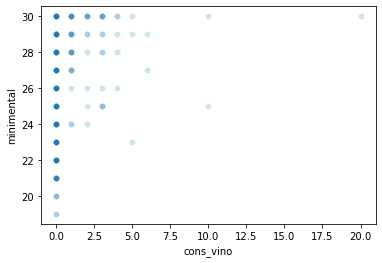

In [40]:
sns.scatterplot(data=df, x= 'cons_vino',y='minimental', alpha= 0.2)

<AxesSubplot:xlabel='cons_cerveza', ylabel='minimental'>

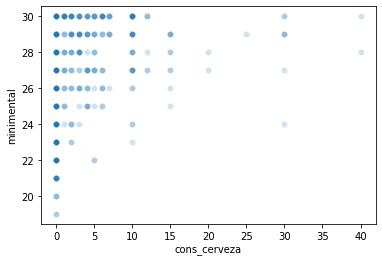

In [41]:
sns.scatterplot(data=df, x= 'cons_cerveza',y='minimental', alpha= 0.2)

<AxesSubplot:xlabel='cons_licor', ylabel='minimental'>

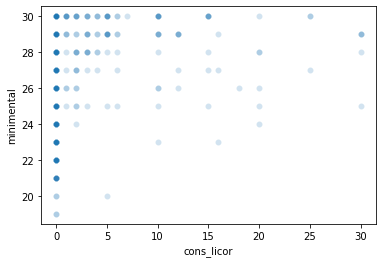

In [42]:
sns.scatterplot(data=df, x= 'cons_licor',y='minimental', alpha= 0.2)

<AxesSubplot:xlabel='test_depresion', ylabel='minimental'>

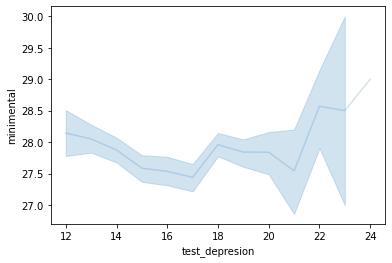

In [43]:
sns.lineplot(data=df, x= 'test_depresion',y='minimental', alpha= 0.2)

<AxesSubplot:xlabel='talla', ylabel='escala_memoria'>

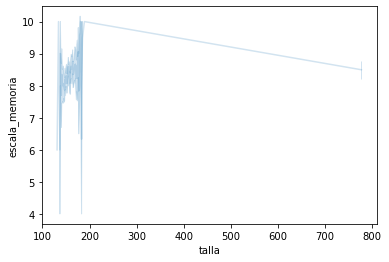

In [44]:
sns.lineplot(data=df, x= 'talla',y='escala_memoria', alpha= 0.2)
#plt.xlim(0,200)

In [45]:
#borrar outliers de peso y outliers de talla
print(df['peso'].max())
print(df['talla'].max())

df.drop(df[df['peso']>700].index, axis=0, inplace=True)
df.drop(df[df['talla']>700].index, axis=0, inplace=True)

777
777


In [46]:
print(df['peso'].max())
print(df['talla'].max())

131
189


(array([  2.,  89., 446., 672., 538., 522., 341., 114.,  23.,   5.]),
 array([131. , 136.8, 142.6, 148.4, 154.2, 160. , 165.8, 171.6, 177.4,
        183.2, 189. ]),
 <BarContainer object of 10 artists>)

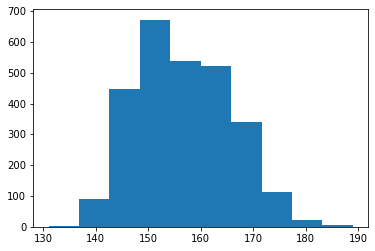

In [47]:
plt.hist(df['talla'])

(array([  2.,  89., 446., 672., 538., 522., 341., 114.,  23.,   5.]),
 array([131. , 136.8, 142.6, 148.4, 154.2, 160. , 165.8, 171.6, 177.4,
        183.2, 189. ]),
 <BarContainer object of 10 artists>)

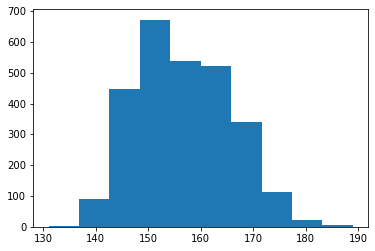

In [48]:
plt.hist(df['talla'])


In [49]:
df['actividad_fisica'].replace({1:1,2:0}, inplace=True)

<AxesSubplot:xlabel='escala_memoria', ylabel='test_depresion'>

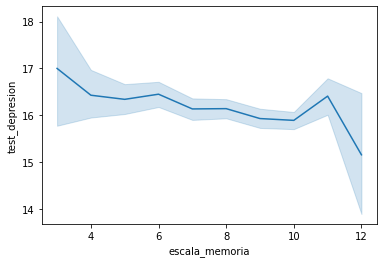

In [50]:
sns.lineplot(data = df, y= 'test_depresion', x= 'escala_memoria')

<AxesSubplot:xlabel='escala_memoria', ylabel='minimental'>

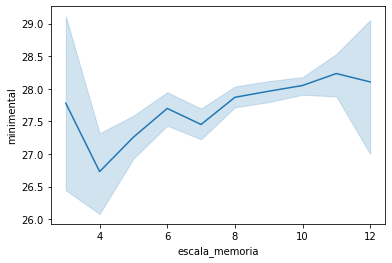

In [51]:
sns.lineplot(data = df, y= 'minimental', x= 'escala_memoria')

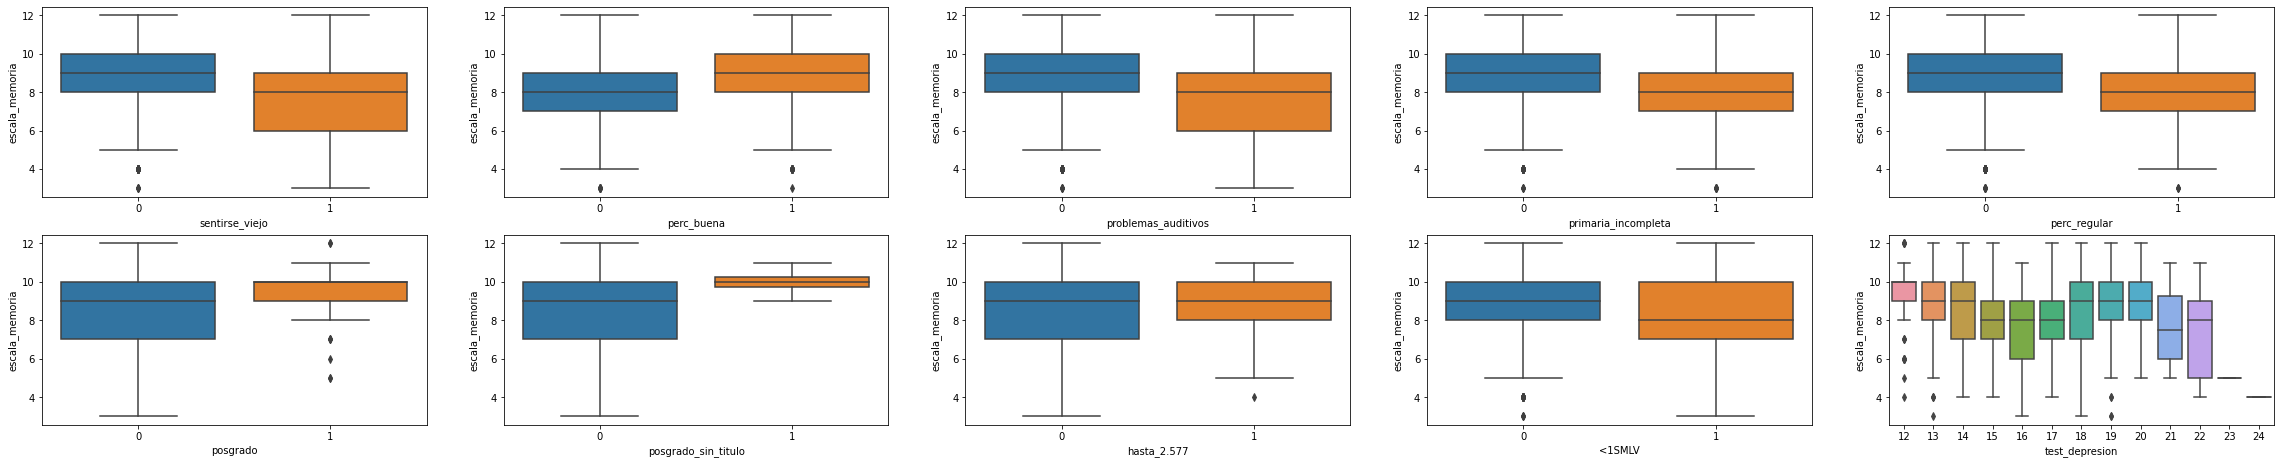

In [52]:
plt.figure(figsize=(40,100))
for i, col in enumerate(cols_corr):
    plt.subplot(24,5 , i+1)
    sns.boxplot(data = df, y= 'escala_memoria', x= col)
    #sns.stripplot(x=col, y='escala_memoria', data=df, alpha = 0.2, color = 'black')
    # display plot
   # plt.show()
    plt.legend('', frameon = False)

        

<AxesSubplot:xlabel='sexo', ylabel='Count'>

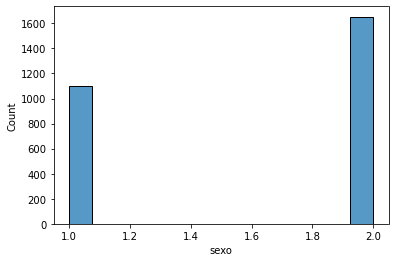

In [53]:
sns.histplot(data=df, x = 'sexo')

In [54]:
#mujeres con depresion
mujeres = len(df.query('sexo ==1'))
mujeres_depresion = len(df.query('sexo == 1 and test_depresion >18'))
porc_muj_depresion = mujeres_depresion*100/mujeres
print(porc_muj_depresion)


16.92447679708826


In [55]:
print(mujeres,mujeres_depresion)
print(mujeres-mujeres_depresion)

1099 186
913


In [56]:
hombres = len(df.query('sexo ==2'))
hombres_depresion = len(df.query('sexo == 2 and test_depresion>18'))
porc_hom_depresion = hombres_depresion*100/hombres
print(porc_hom_depresion)

16.999395039322444


In [57]:
print(hombres,hombres_depresion)
print(hombres-hombres_depresion)

1653 281
1372


In [58]:
#mujeres con mild depresion
mujeres_mild_depresion = len(df.query('sexo == 1 and test_depresion < 18'))
porc_muj_mild_depresion = mujeres_mild_depresion*100/hombres
print(porc_muj_mild_depresion)

44.88808227465215


In [59]:
print(mujeres_mild_depresion)

742


In [60]:
hombres_mild_depresion = len(df.query('sexo == 2 and test_depresion <18'))
porc_hom_mild_depresion = hombres_mild_depresion*100/hombres
print(porc_hom_mild_depresion)

67.99758015728978


In [61]:
print(hombres_mild_depresion)

1124


(0.0, 20.0)

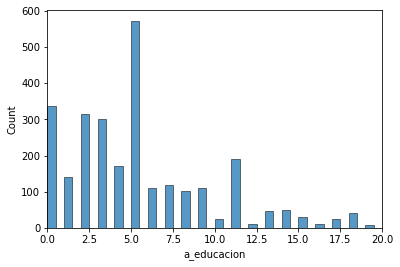

In [62]:
sns.histplot(data= df, x = 'a_educacion', binwidth = 0.5)
plt.xlim(0,20)

<AxesSubplot:xlabel='nivel_dependencia', ylabel='Count'>

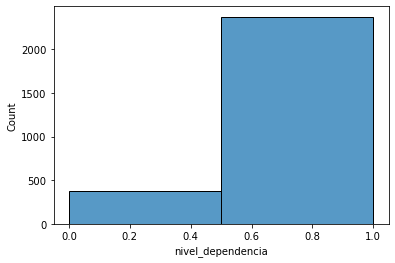

In [63]:
sns.histplot(data= df, x = 'nivel_dependencia', binwidth = 0.5)

In [64]:
len(df.query('nivel_dependencia ==3'))

0

<AxesSubplot:xlabel='escala_memoria', ylabel='Count'>

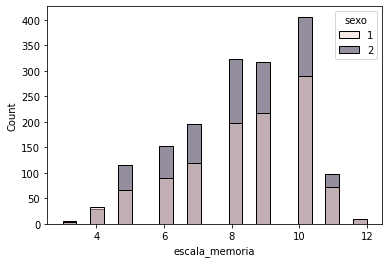

In [65]:
sns.histplot(data= df, x = 'escala_memoria', hue= 'sexo')

<AxesSubplot:xlabel='sexo', ylabel='Count'>

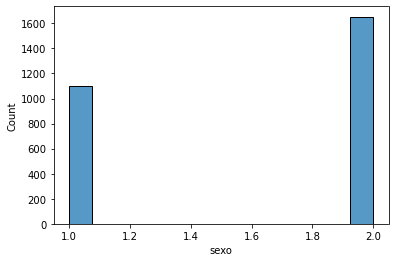

In [66]:
sns.histplot(data= df, x = 'sexo')

<AxesSubplot:xlabel='test_depresion', ylabel='Count'>

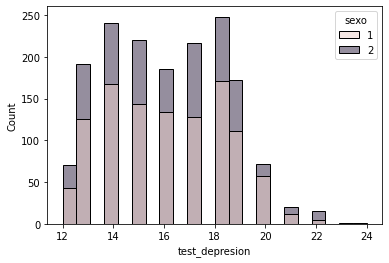

In [67]:
sns.histplot(data= df, x = 'test_depresion', hue= 'sexo')

In [68]:
#Correlacion con escala_memoria de variables numericas: 
corr = []
columna = []
p_val = []
for col in cols_num:
    r, p = stats.pearsonr(df['minimental'], df[col])
    r = abs(r)
    if (p< 0.05):
        columna.append(col)
        p_val.append(p)
        corr.append(r)

c:\Users\vaorc\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [69]:
r, p = stats.pearsonr(df['minimental'], df['cons_vino'])

In [70]:
r,p

(0.02318519614503429, 0.22402498026014964)

In [71]:
correlacion_pearson = pd.DataFrame(list(zip(columna,p_val,corr)), columns=['columna','p_value','correlacion'])

In [72]:
correlacion_pearson.sort_values(by =['correlacion'],ascending=True)

,columna,p_value,correlacion
6,abandono,3.093318e-02,0.041136
4,cons_cerveza,3.084936e-02,0.041157
2,raza,2.390255e-02,0.043056
8,IMC,9.425420e-03,0.049482
1,num_personas_hogar,1.945289e-03,0.059039
7,peso,7.119786e-04,0.064487
5,vision,6.997639e-06,0.085543
9,velocidad_marcha,9.167082e-10,0.116380
13,barthel,7.833457e-10,0.116852
14,escala_memoria,1.073909e-12,0.135175


In [73]:
cols_corr = ['vision','minimental','a_educacion','edad','peso']

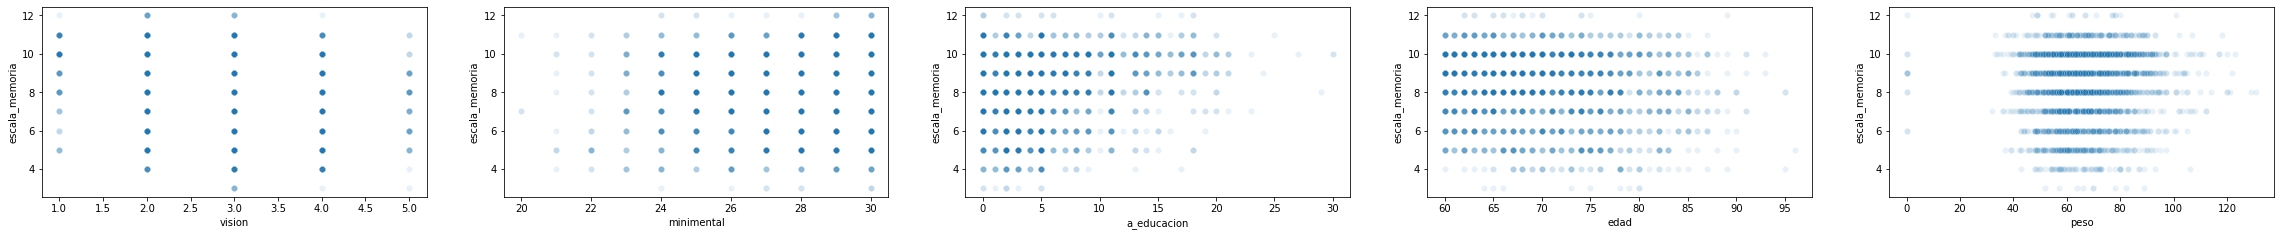

In [74]:
plt.figure(figsize=(40,100))
for i, col in enumerate(cols_corr):
    plt.subplot(24,5 , i+1)
    sns.scatterplot(data = df, y= 'escala_memoria', x= col, alpha= 0.1)
    plt.legend('', frameon = False)

## Variable coherencia

In [75]:
#normalizamos variables numericas
df['minimental_norm'] = (df['minimental']-df['minimental'].min())/(df['minimental'].max()-df['minimental'].min())
df['escala_memoria_norm'] = (df['escala_memoria']-df['escala_memoria'].min())/(df['escala_memoria'].max()-df['escala_memoria'].min())


In [76]:
df['coherencia'] = df['minimental_norm']-df['escala_memoria_norm']

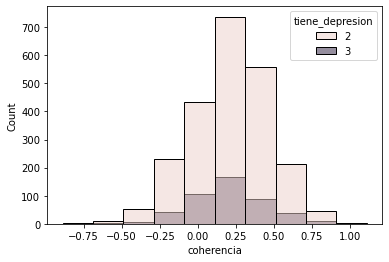

In [77]:
sns.histplot(data= df , x = 'coherencia', binwidth= 0.2, hue= 'tiene_depresion')
plt.show()
# 0 -> coherente
# - -> sobre estima su memoria
# + -> subestima su memoria

In [78]:
len(df.query('-0.25 <=coherencia <= 0.25'))

1535

In [79]:
# coherencia en una unica dirección
# cambiando la dirección -> mayor número mayor coherencia/menor numero incoherente
df['coherencia_unica'] = 1 - abs(df['coherencia'])

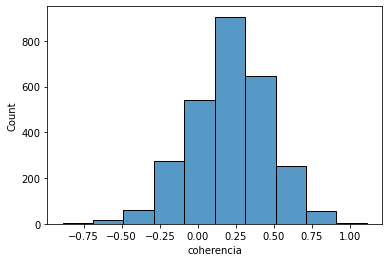

In [80]:
sns.histplot(data= df , x = 'coherencia', binwidth= 0.2)
plt.show()

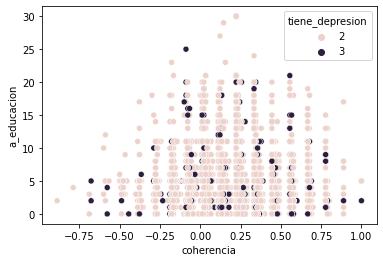

In [81]:
sns.scatterplot(data= df , x = 'coherencia', y='a_educacion', hue= 'tiene_depresion')
plt.show()

In [82]:
# - -> sobre estima su memoria
mujer_sobre_estima = len(df.query('coherencia<-0.2 and sexo== 1'))
procentaje_mujer_sobrestima = mujer_sobre_estima*100/len(df.query('sexo ==1'))
print(procentaje_mujer_sobrestima)


6.551410373066424


In [83]:
hombre_sobre_estima = len(df.query('coherencia<-0.2 and sexo== 2'))
procentaje_hombre_sobrestima = hombre_sobre_estima*100/len(df.query('sexo ==2'))
print(procentaje_hombre_sobrestima)


5.686630369026013


In [84]:
# + -> subestima su memoria
mujer_subestima = len(df.query('coherencia>0.2 and sexo== 1'))
procentaje_mujer_subestima = mujer_subestima*100/len(df.query('sexo ==1'))
print(procentaje_mujer_subestima)

50.04549590536852


In [85]:
# + -> subestima su memoria
hombre_subestima = len(df.query('coherencia>0.2 and sexo== 2'))
procentaje_hombre_subestima = hombre_subestima*100/len(df.query('sexo ==2'))
print(procentaje_hombre_subestima)

53.96249243799153


In [86]:
#coherente 100%
len(df.query('coherencia==0'))

7

In [87]:
#coherente-ish
len(df.query("coherencia>= -0.2 and `coherencia`<=0.2"))

1144

In [88]:
#eliminar filas sabe leer y sabe escribir porque 100% de las personas respondieron de forma afirmativa
df.drop(df[['sabe_escribir','sabe_leer','ha_trabajado']], axis=1, inplace=True)

In [89]:
#reemplazar espacios en blanco y renombrar cols con simbolos no permitidos para XGBoost
df.rename(columns={'<1SMLV':'mas_de_1SMLV'}, inplace=True)
df.replace({'','_'}, inplace= True)

area_vivienda          None
sexo                   None
edad                   None
num_personas_hogar     None
grupo_etnico           None
                       ... 
borderline             None
minimental_norm        None
escala_memoria_norm    None
coherencia             None
coherencia_unica       None
Length: 213, dtype: object

In [90]:
#guardar nuevo dataset con variable coherencia
df.to_csv('dataset_coherencia.csv', index=False, header=True)

In [91]:
df_coherencia = pd.read_csv('dataset_coherencia.csv')

In [92]:
df_coherencia.head()

,area_vivienda,sexo,edad,num_personas_hogar,grupo_etnico,raza,a_educacion,edad_primer_trabajo,dependencia_economica,habitacion_unica,...,apartamento,cuarto inquilinato,cuarto,otro,normal,borderline,minimental_norm,escala_memoria_norm,coherencia,coherencia_unica
0,1,1,66,7,6,5,2,15,1,1,...,0,0,0,0,1,0,0.8,0.000000,0.800000,0.200000
1,1,2,62,7,6,4,5,13,1,1,...,0,0,0,0,1,0,0.5,0.777778,-0.277778,0.722222
2,1,2,66,3,1,5,7,20,1,1,...,0,0,0,0,1,0,0.9,0.222222,0.677778,0.322222
3,1,1,61,2,6,5,11,12,1,1,...,1,0,0,0,1,0,1.0,0.333333,0.666667,0.333333
4,1,2,75,2,6,5,6,22,1,1,...,1,0,0,0,1,0,1.0,0.444444,0.555556,0.444444


## Crear DATASET para categorización coherente/incoherente

In [93]:
df_coherencia = pd.read_csv('dataset_coherencia.csv')

In [94]:
def categoria_coherencia(valor):
    if -0.25 <= valor and valor <=0.25:
        return 'coherente' 
    else:
        return 'incoherente'

In [95]:
"""def categoria_coherencia(valor):
    if -0.25 <= valor and valor <=0.25:
        return 'coherente' 
    elif valor > 0.25: 
        return 'subestima'
    elif  valor < -0.25:
        return 'sobre estima'
    else:
        print(4, valor)"""
        

"def categoria_coherencia(valor):\n    if -0.25 <= valor and valor <=0.25:\n        return 'coherente' \n    elif valor > 0.25: \n        return 'subestima'\n    elif  valor < -0.25:\n        return 'sobre estima'\n    else:\n        print(4, valor)"

In [96]:
 #creacion de categorias
df_coherencia['coherencia_cat'] = df_coherencia['coherencia'].map(categoria_coherencia)

In [97]:
df_coherencia['coherencia_cat'].isna().any()

False

In [98]:
df_coherencia['coherencia_cat'].value_counts()

coherente      1535
incoherente    1217
Name: coherencia_cat, dtype: int64

In [99]:
df_coherencia.drop(columns=['coherencia', 'coherencia_unica','minimental','normal','orientacion', 'conteo','borderline','minimental_norm','escala_memoria','escala_memoria_norm','problemas_memoria_4','problemas_memoria_3','problemas_memoria_2','problemas_memoria_1','minimental_norm','comparacion_memoria_1','comparacion_memoria_2','comparacion_memoria_3','mem_muy_buena','mem_mala','mem_regular','mem_buena','mem_muy_mala'], inplace= True)

In [100]:
df_coherencia.to_csv('XGBOOST_CLAS/coherencia_class.csv',index=False, header=True)